# Begining of Basic Image Processing

In [50]:
:dep anyhow = "1.0.66"
:dep opencv = "0.70.0"
:dep image = "0.23"
:dep evcxr_image = "1.1.0"
:dep plotters = { version = "^0.3.0", default_features = true, features = ["evcxr", "all_series"] }
extern crate plotters;

use std::fs;
use std::path::{Path};
use anyhow::{anyhow, Result, Error};
use opencv::prelude::*;
use image::{ImageBuffer, RgbImage, Rgb};
use evcxr_image::ImageDisplay;
use plotters::{prelude::*, drawing};

fn opencv_imshow(img: Mat) {
    let rgb_img = RgbImage::new(img.cols() as u32, img.rows() as u32);
    let data: Vec<u8> = img.data_bytes().unwrap().to_owned();
    let channels: u32 = img.channels() as u32;
    image::ImageBuffer::from_fn(rgb_img.width(), rgb_img.height(),  | x, y | {
        let yi = y * rgb_img.width();
        let i: usize = ((x + yi) * channels) as usize;
        match channels {
            3 => {
                let b = data[i];
                let g = data[i + 1];
                let r = data[i + 2];
                image::Rgb([r, g, b])
            },
            2 => {
                let b = data[i];
                let g = data[i + 1];
                image::Rgb([0, g, b])
            },
            _ => {
                let b = data[i];
                image::Rgb([b, b, b])
            }
        }
    }).evcxr_display()
}

let image_dir = "/home/cloud-user/workspace/KU15627-Computer-Vision/images";

In [3]:
for file in fs::read_dir(image_dir).unwrap().filter_map(|file| file.ok()) {
    println!("{}", file.path().to_path_buf().file_name().unwrap().to_str().unwrap());
  }

Balloon.bmp
Airplane.bmp
Sailboat.bmp
Earth.bmp
Aerial.bmp
Parrots.bmp
Pepper.bmp
Lenna.bmp
Mandrill.bmp
Girl.bmp
couple.bmp
milkdrop.bmp


()

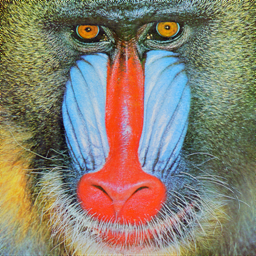

In [34]:
let image_path = Path::new(image_dir).join("Mandrill.bmp");
let img: Mat = opencv::imgcodecs::imread(image_path.to_str().unwrap(), opencv::imgcodecs::IMREAD_UNCHANGED).unwrap();
opencv_imshow(img.clone().to_owned())

In [28]:
println!("height: {}", img.cols());
println!("width: {}", img.rows());
println!("channels: {}", img.channels());

height: 256
width: 256
channels: 3


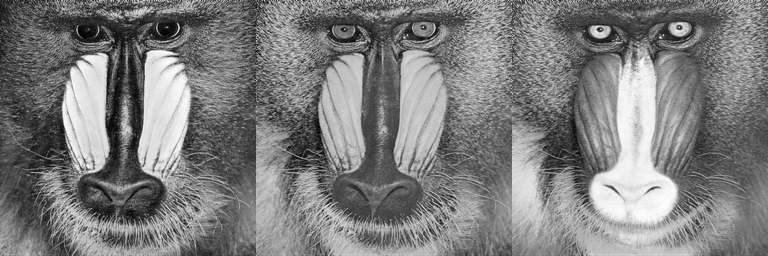

In [51]:
let mut channels: opencv::core::Vector<Mat> = opencv::types::VectorOfMat::new();
opencv::core::split(&img, &mut channels);

let mut out: Mat = Default::default();
opencv::core::hconcat(&channels, &mut out).expect("error on concat");
opencv_imshow(out.clone().to_owned())